Import Modul yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Membuka file data rumah
data = pd.read_excel("rumah.xls")

In [3]:
data

,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,lokasi
0,1900000000,118,80,3,1,1,jakarta_pusat
1,1400000000,52,102,4,2,2,jakarta_pusat
2,1500000000,91,91,10,6,3,jakarta_pusat
3,2500000000,105,150,5,4,2,jakarta_pusat
4,4000000000,160,160,4,3,1,jakarta_pusat
...,...,...,...,...,...,...,...
1134,27900000000,625,750,6,5,2,jakarta_barat
1135,6500000000,871,200,3,2,1,jakarta_barat
1136,2650000000,125,185,3,3,2,jakarta_barat
1137,3500000000,288,245,4,4,2,jakarta_barat


Exploratory Data Analysis (EDA)

In [4]:
#Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   harga          1139 non-null   int64 
 1   luas_tanah     1139 non-null   int64 
 2   luas_bangunan  1139 non-null   int64 
 3   kamar_tidur    1139 non-null   int64 
 4   kamar_mandi    1139 non-null   int64 
 5   lantai         1139 non-null   int64 
 6   lokasi         1139 non-null   object
dtypes: int64(6), object(1)
memory usage: 62.4+ KB


In [5]:
data.describe()

,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai
count,1.139000e+03,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000
mean,4.274402e+09,181.100088,198.640913,3.877085,3.060579,2.011414
std,7.157735e+09,326.893374,192.216226,1.661830,1.433598,0.659426
min,8.500000e+07,16.000000,7.000000,1.000000,1.000000,1.000000
25%,1.200000e+09,67.000000,84.000000,3.000000,2.000000,2.000000
50%,2.400000e+09,108.000000,148.000000,4.000000,3.000000,2.000000
75%,4.500000e+09,200.000000,250.000000,5.000000,4.000000,2.000000
max,1.000000e+11,8200.000000,2700.000000,12.000000,10.000000,6.000000


<Axes: xlabel='harga', ylabel='Count'>

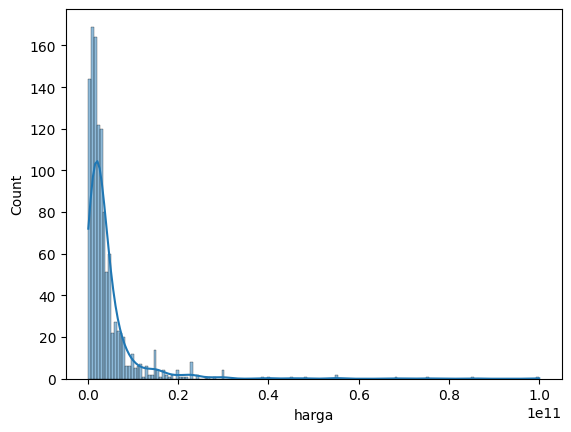

In [6]:
sns.histplot(data['harga'],kde=True)

<Axes: xlabel='harga', ylabel='Count'>

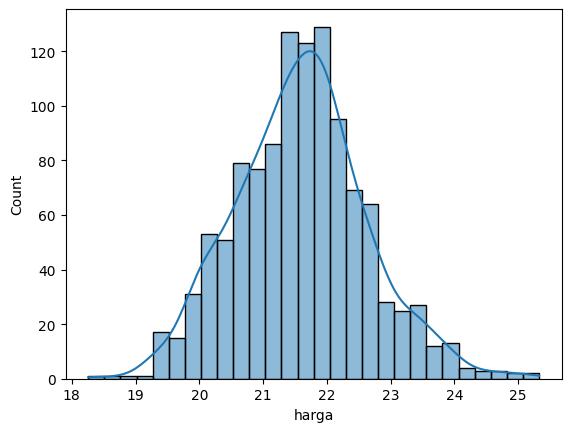

In [7]:
data['harga'] = np.log1p(data['harga'])
sns.histplot(data['harga'],kde=True)

In [8]:
# Menghitung jumlah rumah dijual di setiap lokasi
jumlah_rumah_per_lokasi = data['lokasi'].value_counts()

# Menampilkan hasil
print(jumlah_rumah_per_lokasi)

lokasi
jakarta_barat      371
jakarta_timur      249
jakarta_selatan    226
jakarta_utara      171
jakarta_pusat      122
Name: count, dtype: int64


<Figure size 1500x800 with 0 Axes>

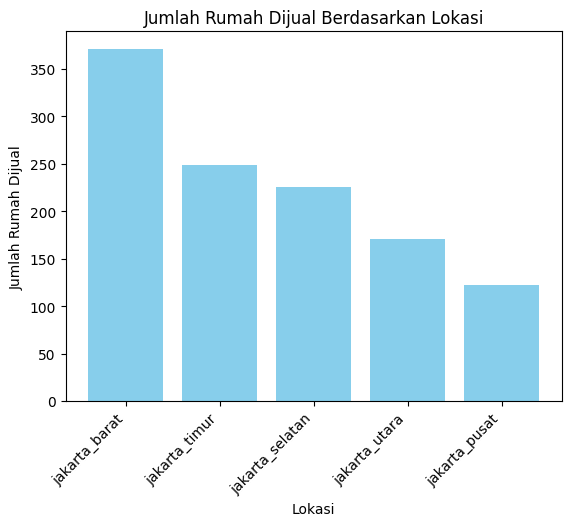

<Figure size 1500x800 with 0 Axes>

In [9]:
# Membuat histogram
plt.bar(jumlah_rumah_per_lokasi.index, jumlah_rumah_per_lokasi.values, color='skyblue')
plt.xlabel('Lokasi')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Jumlah Rumah Dijual')
plt.title('Jumlah Rumah Dijual Berdasarkan Lokasi')
plt.figure(figsize=(15, 8))

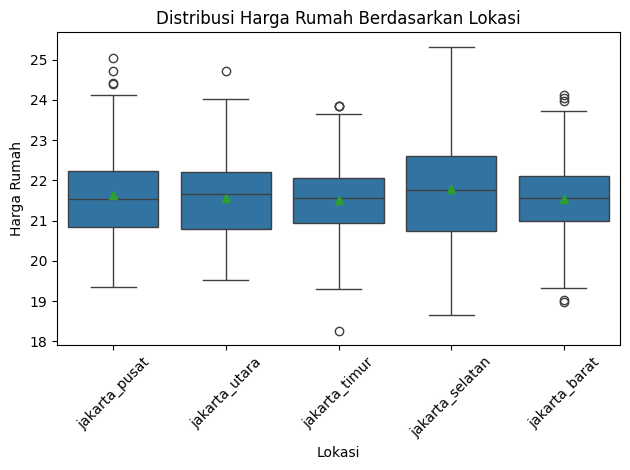

In [10]:
# Create a boxplot
sns.boxplot(
    x = "lokasi",
    y = "harga",
    showmeans=True,  # Show means as points on top of the boxes
    data=data)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.title('Distribusi Harga Rumah Berdasarkan Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Harga Rumah')
plt.tight_layout()
plt.show()

In [11]:
#Distribusi Harga di setiap lokasi
harga_lokasi = data.groupby('lokasi')['harga'].describe()

In [12]:
harga_lokasi

,count,mean,std,min,25%,50%,75%,max
lokasi,,,,,,,,
jakarta_barat,371.0,21.543796,0.887508,18.980297,20.985630,21.556175,22.100765,24.124463
jakarta_pusat,122.0,21.625417,1.073906,19.336971,20.850534,21.545186,22.227343,25.040754
jakarta_selatan,226.0,21.790034,1.303035,18.643824,20.746866,21.761735,22.617797,25.328436
jakarta_timur,249.0,21.513250,0.907653,18.258162,20.946409,21.556175,22.058267,23.858760
jakarta_utara,171.0,21.553968,1.012588,19.515954,20.785933,21.659359,22.204612,24.730599


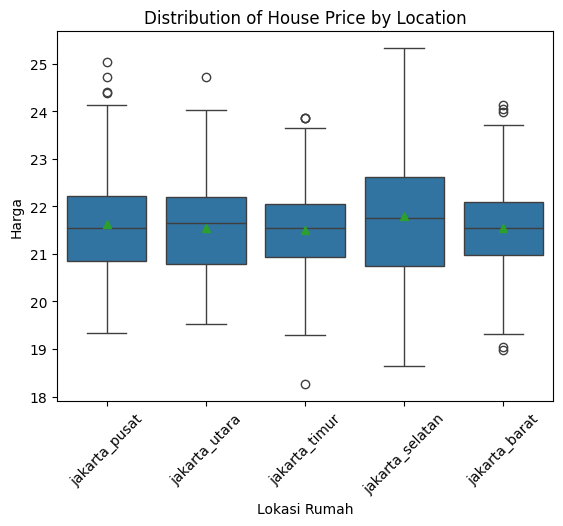

In [13]:
# Create a box plot of house price by house location
sns.boxplot(
    x = "lokasi",
    y = "harga",
    showmeans=True,  # Show the mean as a diamond
    data=data
)

# Rotate x labels to prevent overlapping (optional)
plt.xticks(rotation=45)  # Rotate x labels by 45 degrees

# Add a title and labels
plt.title("Distribution of House Price by Location")
plt.xlabel("Lokasi Rumah")
plt.ylabel("Harga")

# Show the plot
plt.show()

In [14]:
data = data.join(pd.get_dummies(data.lokasi)).drop(['lokasi'], axis=1)

In [15]:
data

,harga,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,jakarta_barat,jakarta_pusat,jakarta_selatan,jakarta_timur,jakarta_utara
0,21.365120,118,80,3,1,1,False,True,False,False,False
1,21.059738,52,102,4,2,2,False,True,False,False,False
2,21.128731,91,91,10,6,3,False,True,False,False,False
3,21.639557,105,150,5,4,2,False,True,False,False,False
4,22.109560,160,160,4,3,1,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1134,24.051893,625,750,6,5,2,True,False,False,False,False
1135,22.595068,871,200,3,2,1,True,False,False,False,False
1136,21.697825,125,185,3,3,2,True,False,False,False,False
1137,21.976029,288,245,4,4,2,True,False,False,False,False


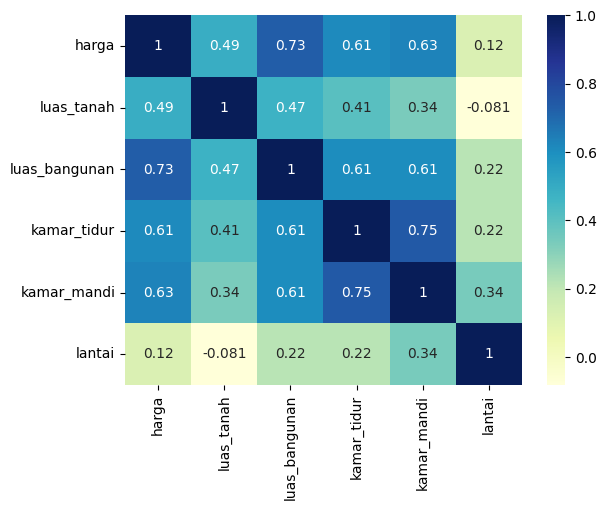

In [16]:
# Select the columns that are numerical (dtype='int64' or 'float64')
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix for the numerical columns
corr_matrix = data[numerical_cols].corr()

# Create the heatmap with annotations, colormap, and figure size
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [17]:
corr_matrix["harga"].sort_values(ascending=False)

harga            1.000000
luas_bangunan    0.731025
kamar_mandi      0.629053
kamar_tidur      0.612647
luas_tanah       0.493055
lantai           0.122751
Name: harga, dtype: float64

<Axes: xlabel='lantai', ylabel='harga'>

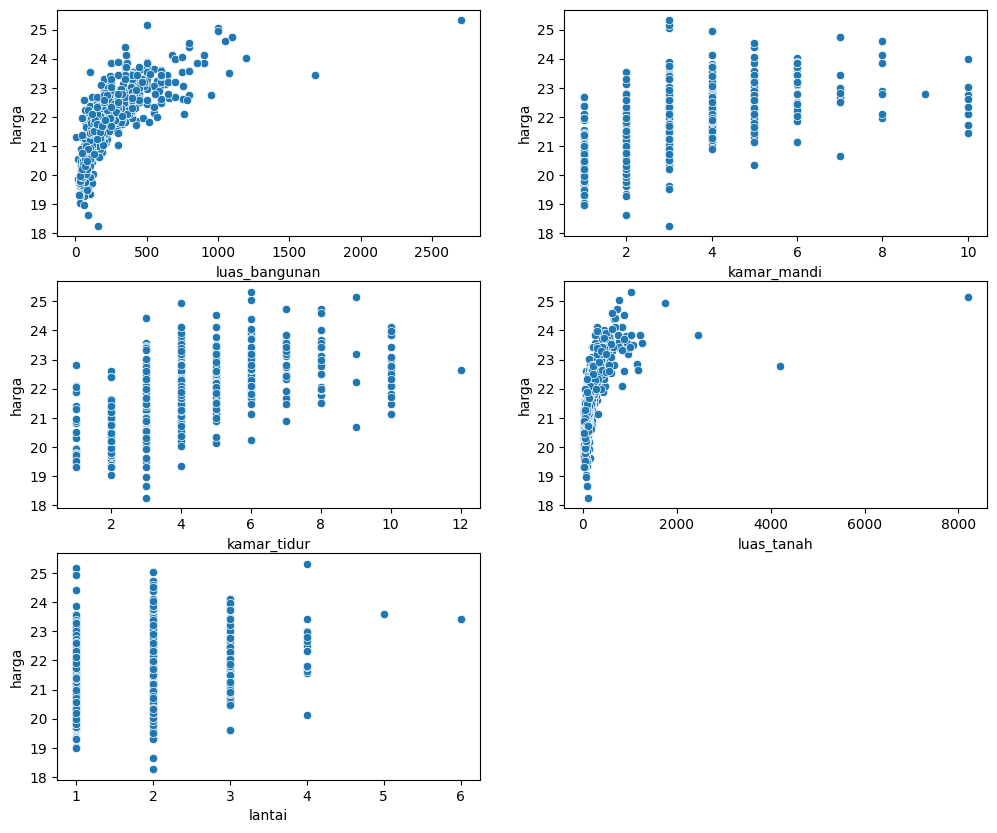

In [18]:
fig = plt.figure(figsize=(12,10))
#lb
plt.subplot(321)
sns.scatterplot(data=data, x='luas_bangunan', y="harga")
#km
plt.subplot(322)
sns.scatterplot(data=data, x='kamar_mandi', y="harga")
#kt
plt.subplot(323)
sns.scatterplot(data=data, x='kamar_tidur', y="harga")
#lt
plt.subplot(324)
sns.scatterplot(data=data, x='luas_tanah', y="harga")
#lantai
plt.subplot(325)
sns.scatterplot(data=data, x='lantai', y="harga")

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = data.drop(['harga'], axis=1)
y = data['harga']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
train_data = X_train.join(y_train)

In [23]:
test_data = X_test.join(y_test)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(911, 10) (228, 10) (911,) (228,)


In [25]:
data = pd.concat([train_data,test_data], axis=0)
y_train = train_data['harga']
data = data.drop(['harga'], axis=1)
print(data.shape)

(1139, 10)


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1139 entries, 12 to 922
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   luas_tanah       1139 non-null   int64
 1   luas_bangunan    1139 non-null   int64
 2   kamar_tidur      1139 non-null   int64
 3   kamar_mandi      1139 non-null   int64
 4   lantai           1139 non-null   int64
 5   jakarta_barat    1139 non-null   bool 
 6   jakarta_pusat    1139 non-null   bool 
 7   jakarta_selatan  1139 non-null   bool 
 8   jakarta_timur    1139 non-null   bool 
 9   jakarta_utara    1139 non-null   bool 
dtypes: bool(5), int64(5)
memory usage: 59.0 KB


<Axes: ylabel='count'>

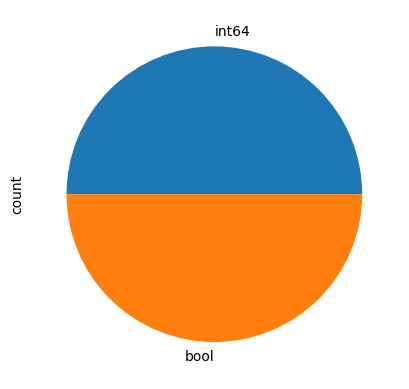

In [27]:
data.dtypes.value_counts().plot.pie()

In [28]:
print('UNIQUE VALUES\n')
for col in data.columns:
    print(f'{col}: {len(data[col].unique())}\n')

UNIQUE VALUES

luas_tanah: 316

luas_bangunan: 244

kamar_tidur: 11

kamar_mandi: 10

lantai: 6

jakarta_barat: 2

jakarta_pusat: 2

jakarta_selatan: 2

jakarta_timur: 2

jakarta_utara: 2



In [29]:
#Filling the numeric data
numeric_missed = ['luas_tanah',
'luas_bangunan',
'kamar_tidur',
'kamar_mandi',
'lantai']
for feature in numeric_missed:
    data[feature] = data[feature].fillna(0)
#Filling the categorical data
categorical_missed = ['jakarta_pusat',
'jakarta_utara',
'jakarta_timur',
'jakarta_selatan',
'jakarta_barat']
for feature in categorical_missed:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

In [30]:
#Checking for any remaining null values
data.isnull().sum().max()

0

In [31]:
import scipy.stats as stats
from scipy.stats import skew

In [32]:
#Top skewed columns
numeric_features = data.dtypes[data.dtypes != 'object'].index
skewed_features = data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 0.5]
print(high_skew)

luas_tanah         15.363286
luas_bangunan       4.134100
jakarta_pusat       2.540871
jakarta_utara       1.958947
jakarta_selatan     1.512402
kamar_mandi         1.363496
jakarta_timur       1.361643
kamar_tidur         1.339146
jakarta_barat       0.743743
lantai              0.742100
dtype: float64


In [33]:
#Transforming skewed columns
for feature in high_skew.index:
    data[feature] = np.log1p(data[feature])

In [34]:
#Dividing data back into train & test
train = data[:len(y_train)]
test = data[len(y_test):]
#Printing their shapes
print(train.shape, test.shape)

(911, 10) (911, 10)


In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

In [38]:
# Calculate R-squared for both training and testing sets
r2_train = r2_score(y_train, y_pred_train_lr)
r2_test = r2_score(y_test, y_pred_test_lr)
print("Training R-squared:", r2_train)
print("Testing R-squared:", r2_test)

Training R-squared: 0.6431470707696412
Testing R-squared: 0.5313819667872769


In [39]:
# R-squared
r2 = r2_score(y_test, y_pred_test_lr)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test_lr)
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test_lr)
# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_test_lr) * 100  # Convert to percentage

print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)

R-squared: 0.5313819667872769
MAE: 0.45949768905627936
MSE: 0.4403394948970407
MAPE: 2.119277930359841


Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Default parameter pada RandomForestRegressor
n_estimators = 100  # Number of decision trees
max_depth = None  # Maximum depth of each tree
min_samples_split = 2  # Minimum number of samples required to split a node
min_samples_leaf = 1  # Minimum number of samples required at each leaf node

# Create the model
clf = RandomForestRegressor(n_estimators=n_estimators,
                           max_depth=max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf)

In [42]:
clf.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
clf.score(X_test,y_test)

0.8464478048234406

In [44]:
y_pred_train_rfr = clf.predict(X_train)

In [45]:
y_pred_test_rfr = clf.predict(X_test)

In [46]:
# Calculate R-squared for both training and testing sets
r2_train = r2_score(y_train, y_pred_train_rfr)
r2_test = r2_score(y_test, y_pred_test_rfr)
print("Training R-squared:", r2_train)
print("Testing R-squared:", r2_test)

Training R-squared: 0.9738235977752636
Testing R-squared: 0.8464478048234406


In [47]:
# R-squared
r2 = r2_score(y_test, y_pred_test_rfr)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test_rfr)
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test_rfr)
# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_test_rfr) * 100  # Convert to percentage

print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)

R-squared: 0.8464478048234406
MAE: 0.2729955938382657
MSE: 0.1442861590298318
MAPE: 1.2569974696172204


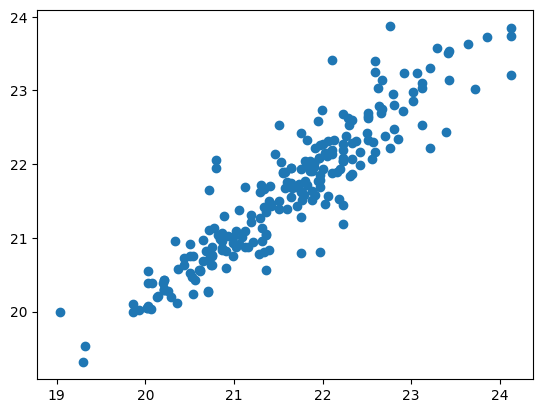

In [49]:
plt.scatter(y_test, y_pred_test_rfr);

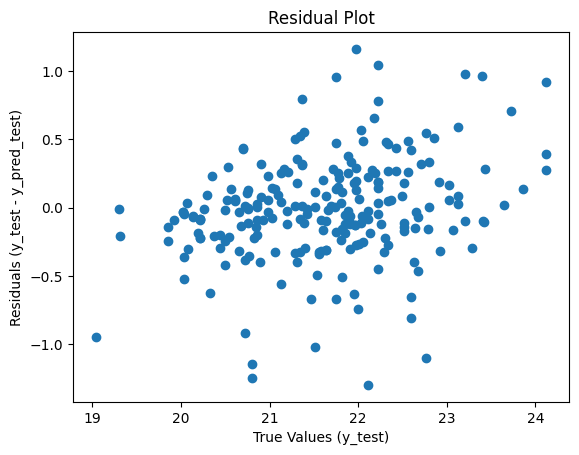

In [51]:
# Calculate residuals (difference between actual and predicted)
residuals = y_test - y_pred_test_rfr

# Create a scatter plot of residuals vs y_test
plt.scatter(y_test, residuals)

# Add labels and title
plt.xlabel("True Values (y_test)")
plt.ylabel("Residuals (y_test - y_pred_test)")
plt.title("Residual Plot")

plt.show()

In [52]:
# Feature Importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [53]:
importances.head(10)

,importance
feature,
luas_bangunan,0.521
luas_tanah,0.393
kamar_tidur,0.022
kamar_mandi,0.022
lantai,0.010
jakarta_timur,0.009
jakarta_pusat,0.008
jakarta_selatan,0.008
jakarta_barat,0.005


<Axes: xlabel='feature'>

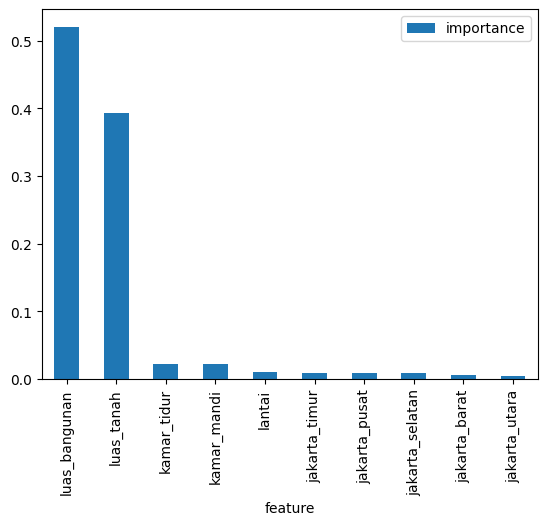

In [54]:
importances.plot.bar()

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error 
import random  # Import the random module

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [1, 20, 50, 100],  # Maximum depth of trees
    'min_samples_split': [2, 4, 8, 20],  # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10, 20], # Minimum samples leaf
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create and fit GridSearchCV object
model_cv = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
model_cv.fit(X_train, y_train)

# Access best parameters and best model
best_params = model_cv.best_params_
best_model = model_cv.best_estimator_

In [ ]:
# Get the best model and its score
best_score = model_cv.best_score_

In [ ]:
# Make predictions on test data
y_pred = model_cv.best_estimator_.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the results
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

In [ ]:
random_forest_oob = RandomForestRegressor(oob_score=True)
random_forest_oob.fit(X_train, y_train)
print(random_forest_oob.oob_score_)

In [ ]:
plt.scatter(X_test['luas_tanah'].values, y_test, color = 'green') #actual data
plt.scatter(X_test['luas_tanah'].values, y_pred, color = 'blue') #predicted data
plt.title('Random Forest Regression')
plt.xlabel('RM')
plt.ylabel('Harga')
plt.show() 